Data cleaning steps on titanic data

In [1]:
# Titanic Data Cleaning & Preprocessing Notebook
# Below is a step-by-step cleaning pipeline with comments.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For reproducibility (if random operations are used later)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# %%
# --- Step 1: Load data ---
df = pd.read_csv("C:/Users/joshi/OneDrive/Desktop/Projects/titanic/titanic.csv")  # or 'Titanic-Dataset.csv' depending on your file
print("Initial data info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         

In [4]:
# %%
# --- Step 2: Check for duplicates ---
dup_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {dup_count}")

if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates dropped. New shape:", df.shape)



Number of duplicate rows: 0


In [5]:
# %%
# --- Step 3: Identify categorical vs numerical columns ---
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

print("\nCategorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
# %%
# --- Step 4: Unique value counts for categorical columns ---
print("\nUnique counts in categorical columns:")
print(df[cat_cols].nunique())


Unique counts in categorical columns:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


In [7]:
# %%
# --- Step 5: Missing value percentages ---
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
print("\nMissing value percentages:")
print(missing_pct)


Missing value percentages:
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [8]:
# %%
# --- Step 6: Drop or impute heavily missing / low-signal columns ---
# Common practice: drop Name, Ticket, Cabin
df_clean = df.drop(columns=['Name', 'Ticket', 'Cabin'])
print("\nDropped Name, Ticket, Cabin. Shape:", df_clean.shape)


Dropped Name, Ticket, Cabin. Shape: (891, 9)


In [10]:

# Drop rows where Embarked is missing (if only a few)
embarked_missing = df_clean['Embarked'].isnull().sum()
print("Number of missing Embarked before drop:", embarked_missing)
if embarked_missing > 0:
    df_clean = df_clean.dropna(subset=['Embarked'])
    print("Dropped rows with missing Embarked. New shape:", df_clean.shape)

# Impute Age (using median, more robust than mean if skewed)
age_median = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(age_median)

# Impute Fare (if any missing)
fare_median = df_clean['Fare'].median()
df_clean['Fare'] = df_clean['Fare'].fillna(fare_median)

# Impute Embarked using its mode
embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)

# Double-check missingness
print("\nAfter imputation, missing counts:")
print(df_clean.isnull().sum())


Number of missing Embarked before drop: 0

After imputation, missing counts:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


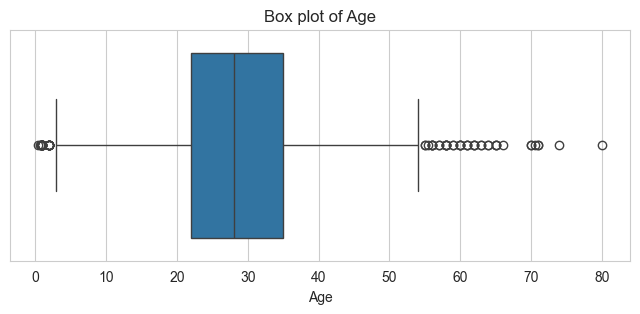

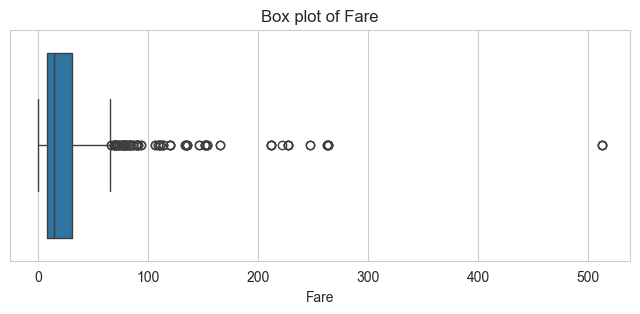

In [11]:
# %%
# --- Step 7: Visualize outliers via boxplot for “Age” and maybe “Fare” ---
plt.figure(figsize=(8, 3))
sns.boxplot(x=df_clean['Age'])
plt.title("Box plot of Age")
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=df_clean['Fare'])
plt.title("Box plot of Fare")
plt.show()

In [12]:
# %%
# --- Step 8: Define outlier bounds (for Age) and remove them ---
mean_age = df_clean['Age'].mean()
std_age = df_clean['Age'].std()
lower = mean_age - 2 * std_age
upper = mean_age + 2 * std_age

print(f"Age outlier bounds: lower = {lower:.2f}, upper = {upper:.2f}")

df_no_out = df_clean[(df_clean['Age'] >= lower) & (df_clean['Age'] <= upper)].copy()
print("Shape after removing Age outliers:", df_no_out.shape)

Age outlier bounds: lower = 3.35, upper = 55.29
Shape after removing Age outliers: (820, 9)


In [13]:
# (Optional) you could also filter outliers on `Fare` using similar logic if needed.
# %%
# --- Step 9: Re-impute any remaining missing values (if any) ---
# (Often none remain after above)
df_final = df_no_out.fillna({
    'Age': df_no_out['Age'].median(),
    'Fare': df_no_out['Fare'].median()
})
print("\nMissing counts in final dataset:")
print(df_final.isnull().sum())


Missing counts in final dataset:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [14]:
# %%
# --- Step 10: (Optional) Recompute bounds & further filter if needed ---
# (This is more cautious; many pipelines skip this)
mean_age2 = df_final['Age'].mean()
std_age2 = df_final['Age'].std()
lower2 = mean_age2 - 2 * std_age2
upper2 = mean_age2 + 2 * std_age2
print(f"Recomputed Age bounds: lower2 = {lower2:.2f}, upper2 = {upper2:.2f}")

df_final2 = df_final[(df_final['Age'] >= lower2) & (df_final['Age'] <= upper2)].copy()
print("Shape after second pass filtering:", df_final2.shape)

# Use df_final2 forward
df_final = df_final2

Recomputed Age bounds: lower2 = 8.66, upper2 = 48.85
Shape after second pass filtering: (756, 9)


In [15]:
# %%
# --- Step 11: Validate & split into X and y ---
print("\nFinal df info:")
print(df_final.info())

# Features and target
X = df_final[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_final['Survived']


Final df info:
<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  756 non-null    int64  
 1   Survived     756 non-null    int64  
 2   Pclass       756 non-null    int64  
 3   Sex          756 non-null    object 
 4   Age          756 non-null    float64
 5   SibSp        756 non-null    int64  
 6   Parch        756 non-null    int64  
 7   Fare         756 non-null    float64
 8   Embarked     756 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 59.1+ KB
None


In [16]:
# %%
# --- Step 12: Encode categorical variables and scale numeric features ---
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 12a: One-hot encode categorical variables (Sex, Embarked)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
print("\nAfter get_dummies, sample of X:")
print(X.head())

# 12b: Scale numeric columns
num_cols = [c for c in X.columns if X[c].dtype in ['int64', 'float64']]

# Choose one:
scaler = StandardScaler()
# Or: scaler = MinMaxScaler(feature_range=(0, 1))

X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nAfter scaling, sample of X:")
print(X.head())



After get_dummies, sample of X:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True

After scaling, sample of X:
     Pclass       Age     SibSp     Parch      Fare  Sex_male  Embarked_Q  \
0  0.768804 -0.783974  0.513326 -0.409448 -0.460334      True       False   
1 -1.683584  1.209080  0.513326 -0.409448  0.800798     False       False   
2  0.768804 -0.285711 -0.435511 -0.409448 -0.447040     False       False   
3 -1.683584  0.835382  0.513326 -0.409448  0.442679     False       False   
4  0.768804  0.835382 -0.435511 -0.409448 -0.444578      True       False   

   Embarked_S  
0        True  
1    

In [17]:
# %%
# --- (Optional) Next steps: train/test split, modeling, etc. ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

print("\nShapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# You can now proceed to train a classifier, validate, etc.



Shapes:
X_train: (604, 8) X_test: (152, 8)
y_train: (604,) y_test: (152,)


-------------------------------------------------------End of notebook-----------------------------------------------------------------------------------